In [32]:
import pandas as pd  
import matplotlib.pyplot as plt 

Reading Water Level At Galchi

In [33]:
wl_galchi_dec10_dec12=pd.read_csv('Dataset/Galchi_2024-12-10 to 2024-12-12.csv')
wl_galchi_dec10_dec12.head()

,dateTime,value
0,2024-12-10 00:00:00,
1,2024-12-10 00:05:00,366.192382812
2,2024-12-10 00:15:00,366.191497803
3,2024-12-10 00:25:00,366.197784424
4,2024-12-10 00:35:00,366.1980896


Handling Null Values in Original Dataset Via Interpolation

In [34]:
def handle_null_values(df):
    #for the first null value with no preceeding value.
    df['value']=df['value'].fillna(method='bfill')
    #since water levels are continuous and expected to follow a natural trend we interpolate null values
    df['value']=df['value'].interpolate(method='linear') 

Handle Obvious Outliers

In [35]:
def handle_outliers(df):
    min_value=50
    max_value=10000000
    # Remove rows where the specific column's value is below the minimum or above the maximum threshold
    df = df[(df[column_name] <= min_value) & (df[column_name] >= max_value)]
    
    # Drop rows where any column contains NaN (if necessary)
    df.dropna(inplace=True)
    
    return df

Converting to relevant data types:

In [36]:
def preprocess_data(df):   
    df['dateTime']=pd.to_datetime(df['dateTime'])
    df['value']=pd.to_numeric(df['value'],errors='coerce')
    df.set_index('dateTime',inplace=True)
    handle_outliers(df)
    handle_null_values(df)


Preprocess Data

In [8]:
#Only the original df should be preprocessed,else there will be error
preprocess_data(wl_galchi_dec10_dec12)

C:\Users\aryan\AppData\Local\Temp\ipykernel_10488\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


In [9]:
wl_galchi_dec10_dec12.head()

,value
dateTime,
2024-12-10 00:00:00,366.192383
2024-12-10 00:05:00,366.192383
2024-12-10 00:15:00,366.191498
2024-12-10 00:25:00,366.197784
2024-12-10 00:35:00,366.198090


Verifying Preprocess Data

In [11]:
print(wl_galchi_dec10_dec12.dtypes)
print(wl_galchi_dec10_dec12)
print(wl_galchi_dec10_dec12.isnull().sum())

value    float64
dtype: object
                          value
dateTime                       
2024-12-10 00:00:00  366.192383
2024-12-10 00:05:00  366.192383
2024-12-10 00:15:00  366.191498
2024-12-10 00:25:00  366.197784
2024-12-10 00:35:00  366.198090
...                         ...
2024-12-12 23:25:00  366.182678
2024-12-12 23:35:00  366.180695
2024-12-12 23:45:00  366.178894
2024-12-12 23:55:00  366.181793
2024-12-12 23:59:59  366.181793

[434 rows x 1 columns]
value    0
dtype: int64


Get Plot Bounds

In [12]:
def get_plot_bounds(input_data):
    # Calculate the min and max values 
    min_value = input_data.min()
    max_value = input_data.max()

    # Adding a small margin to the min and max values to make sure the plot is not clipped
    margin = 0.05  # 5% margin
    min_margin = min_value - margin * (max_value - min_value)
    max_margin = max_value + margin * (max_value - min_value)
    return min_margin,max_margin
    

Plot Water Level Data

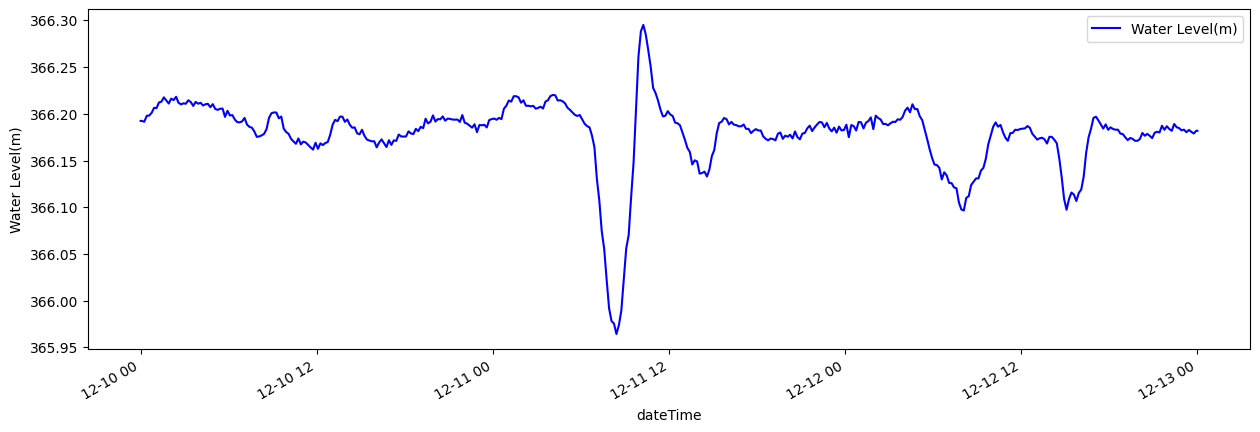

In [29]:
fig,ax=plt.subplots(figsize=(15,5))
# min_margin,max_margin=get_plot_bounds(wl_galchi_dec10_dec12['value'])
wl_galchi_dec10_dec12.plot(ax=ax,color='blue')
ax.set_ylabel('Water Level(m)')
ax.legend(['Water Level(m)'])
# ax.set_ylim(min_margin,max_margin)
plt.show()


Read Water Level at Chumlingtar

In [ ]:
wl_galchi_dec10_dec12=pd.read_csv('Dataset/Galchi_2024-12-10 to 2024-12-12.csv')
wl_galchi_dec10_dec12.head()